# Attrition to Retention: Predictive Modeling for Employee Retention Strategies

In this guide, we will build a predictive machine learning model to estimate the likelihood of employee retention in the face of attrition. 

Read article on [medium](https://www.medium.com/@doyinelugbadebo)

### Install necessary libraries

In [ ]:
#! pip install pandas numpy matplotlib seaborn scikit-learn joblib imbalanced-learn xgboost lightgbm

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Ensure plots are displayed in Jupyter Notebook
%matplotlib inline 

In [2]:
# Load the dataset
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

## Exploratory Data Analysis (EDA)

In [3]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


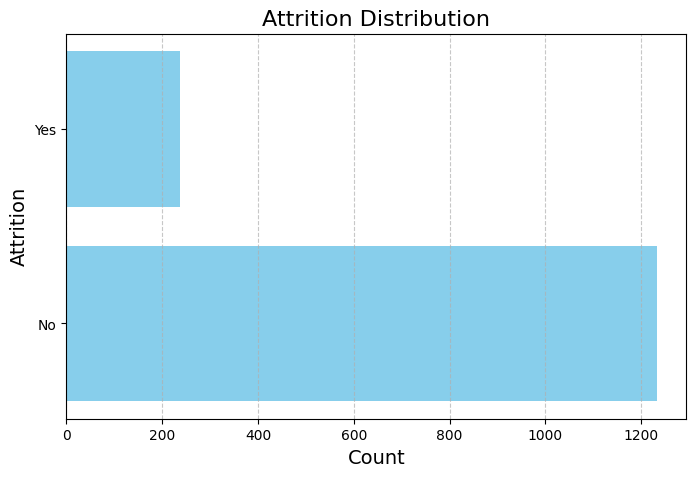

In [6]:
# Count the occurrences of each category in the "Attrition" column
counts = data["Attrition"].value_counts()

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))  

# Plot horizontal bar chart
ax.barh(counts.index, counts.values, color="skyblue") 

# Customize the plot
ax.set_title("Attrition Distribution", fontsize=16)
ax.set_xlabel("Count", fontsize=14)
ax.set_ylabel("Attrition", fontsize=14)
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

### Attrition Distribution by Gender and Department

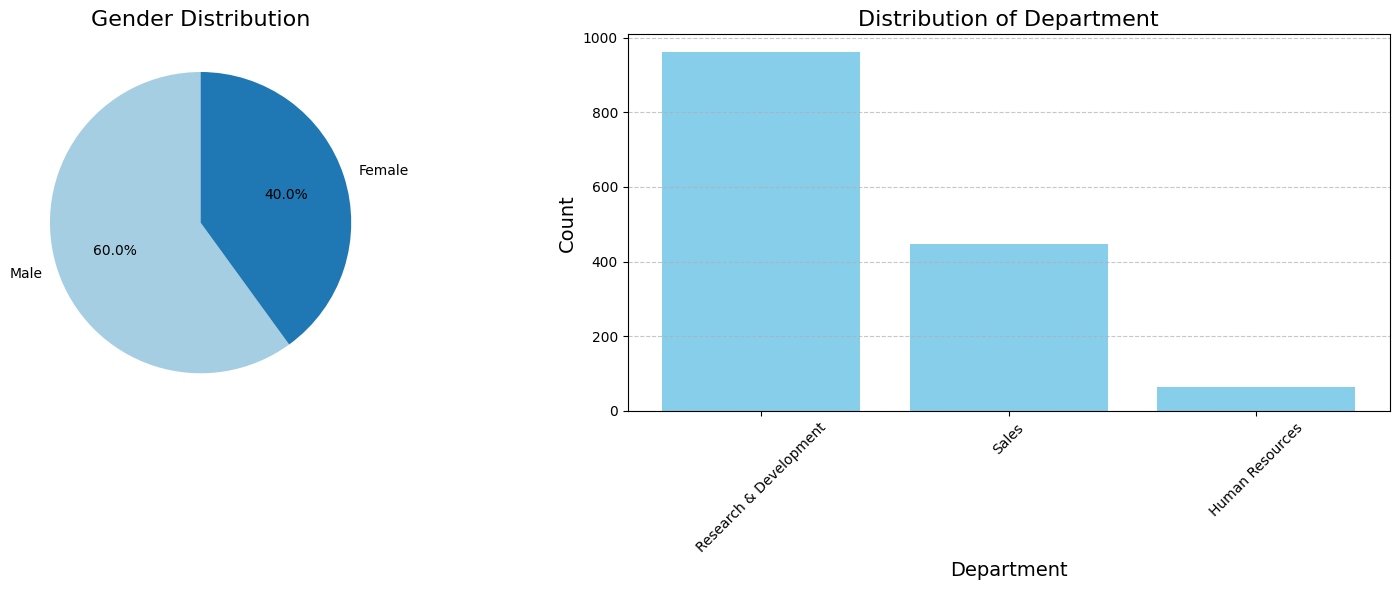

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create two subplots in a single row

# Pie Chart for "Gender" column
gender_counts = data["Gender"].value_counts()
axes[0].pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired(range(len(gender_counts)))
)
axes[0].set_title("Gender Distribution", fontsize=16)

# Bar Chart for "Department" or other columns
counts = data["Department"].value_counts()  
axes[1].bar(counts.index, counts.values, color='skyblue')
axes[1].set_title("Distribution of Department", fontsize=16)
axes[1].set_xlabel("Department", fontsize=14)  
axes[1].set_ylabel("Count", fontsize=14)
axes[1].tick_params(axis="x", rotation=45) 
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Performance Insights

This section explains performance related insights such as Performance Rating versus Monthly Income or using a correlation matrix heatmap to highlight relationships between numerical variables.

In [9]:
# Metric Cards
avg_perf_rating = data["PerformanceRating"].mean().round(2)
avg_job_sat = data["JobSatisfaction"].mean().round(2)
avg_worklife = data["WorkLifeBalance"].mean().round(2)

# Print the calculated values
print(f"Average Performance Rating: {avg_perf_rating}")
print(f"Average Job Satisfaction: {avg_job_sat}")
print(f"Average Work-Life Balance: {avg_worklife}")

Average Performance Rating: 3.15
Average Job Satisfaction: 2.73
Average Work-Life Balance: 2.76


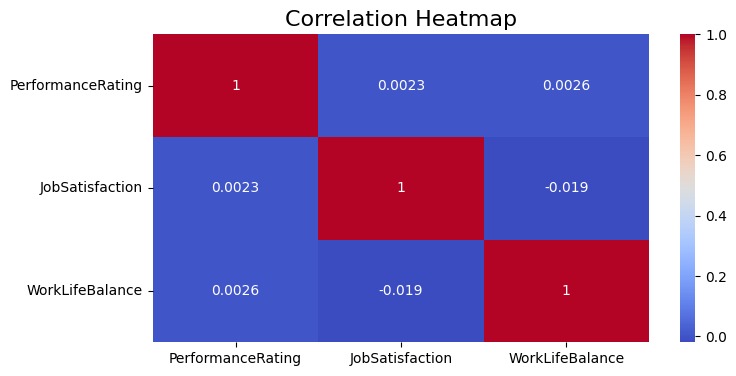

In [10]:
# Correlation Heatmap
corr_matrix = data[["PerformanceRating", "JobSatisfaction", "WorkLifeBalance"]].corr()
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
ax.set_title("Correlation Heatmap", fontsize=16, loc='center')
plt.show()  # Show heatmap

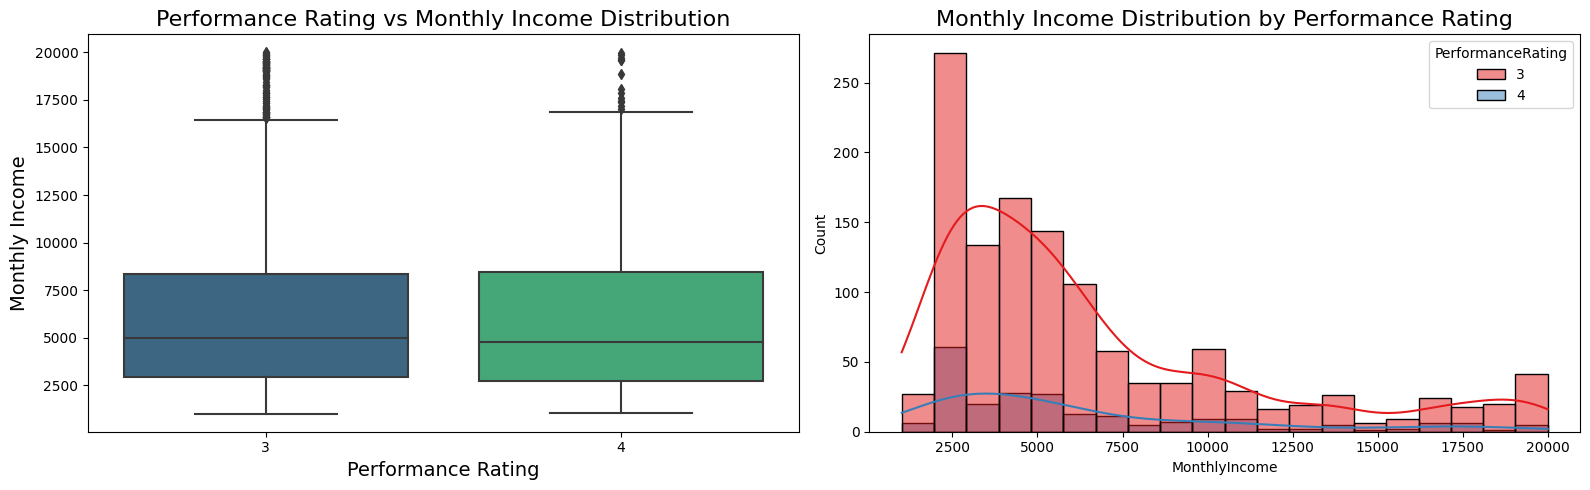

In [11]:
#Examine Monthly Income Distribution for different Performance Ratings
data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Create a figure with 2 subplots in a single row
fig, (ax1, ax2) = plt.subplots(figsize=(16, 5), ncols=2)

# Boxplot: Performance Rating vs Monthly Income Distribution
sns.boxplot(x="PerformanceRating", y="MonthlyIncome", data=data, ax=ax1, palette="viridis")
ax1.set_title("Performance Rating vs Monthly Income Distribution", fontsize=16, loc='center')
ax1.set_xlabel("Performance Rating", fontsize=14)
ax1.set_ylabel("Monthly Income", fontsize=14)

# Histogram: Monthly Income Distribution for different Performance Ratings
sns.histplot(data=data, x="MonthlyIncome", hue="PerformanceRating", kde=True, ax=ax2, palette="Set1")
ax2.set_title("Monthly Income Distribution by Performance Rating", fontsize=16, loc='center')

# Display the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [12]:
# Select the relevant columns for correlation analysis
selected_columns = ["PerformanceRating", "JobSatisfaction", "WorkLifeBalance"]
correlation_matrix = data[selected_columns].corr()

# Print the correlation matrix
print("Correlation Analysis:")
print(correlation_matrix)


Correlation Analysis:
                   PerformanceRating  JobSatisfaction  WorkLifeBalance
PerformanceRating           1.000000         0.002297         0.002572
JobSatisfaction             0.002297         1.000000        -0.019459
WorkLifeBalance             0.002572        -0.019459         1.000000


# Attrition Analysis

Explain

In [13]:
# Metric Cards Calculation
attrition_counts = data["Attrition"].value_counts()
total_employees = len(data)
attrition_rate = (attrition_counts.get("Yes", 0) / total_employees * 100).round(2)
avg_income = data["MonthlyIncome"].mean().round(2)

# Printing the outputs
print(f"Attrition Count (Yes): {attrition_counts.get('Yes', 0)}")
print(f"Attrition Count (No): {attrition_counts.get('No', 0)}")
print(f"Total Employees: {total_employees}")
print(f"Attrition Rate (%): {attrition_rate}%")
print(f"Average Monthly Income: ${avg_income}")


Attrition Count (Yes): 237
Attrition Count (No): 1233
Total Employees: 1470
Attrition Rate (%): 16.12%
Average Monthly Income: $6502.93


### Attrition Analysis
1.	Attrition by JobRole: Horizontal bar chart showing attrition across different job roles.
2.	Attrition by Gender: Bar chart showing the attrition rate by gender.
3.  Attrition by MaritalStatus: Bar chart showing the attrition rate by marital status.
2.	Age Distribution of Employees Leaving: A histogram showing the age distribution of employees who left.
3.	Tenure of Employees Who Left: Box plot showing the tenure of employees who left.
4.	Attrition vs Monthly Income: Scatter plot to analyze the relationship between attrition and monthly income.
5.	Attrition vs Work-Life Balance: Violin plot showing the correlation between attrition and work-life balance.


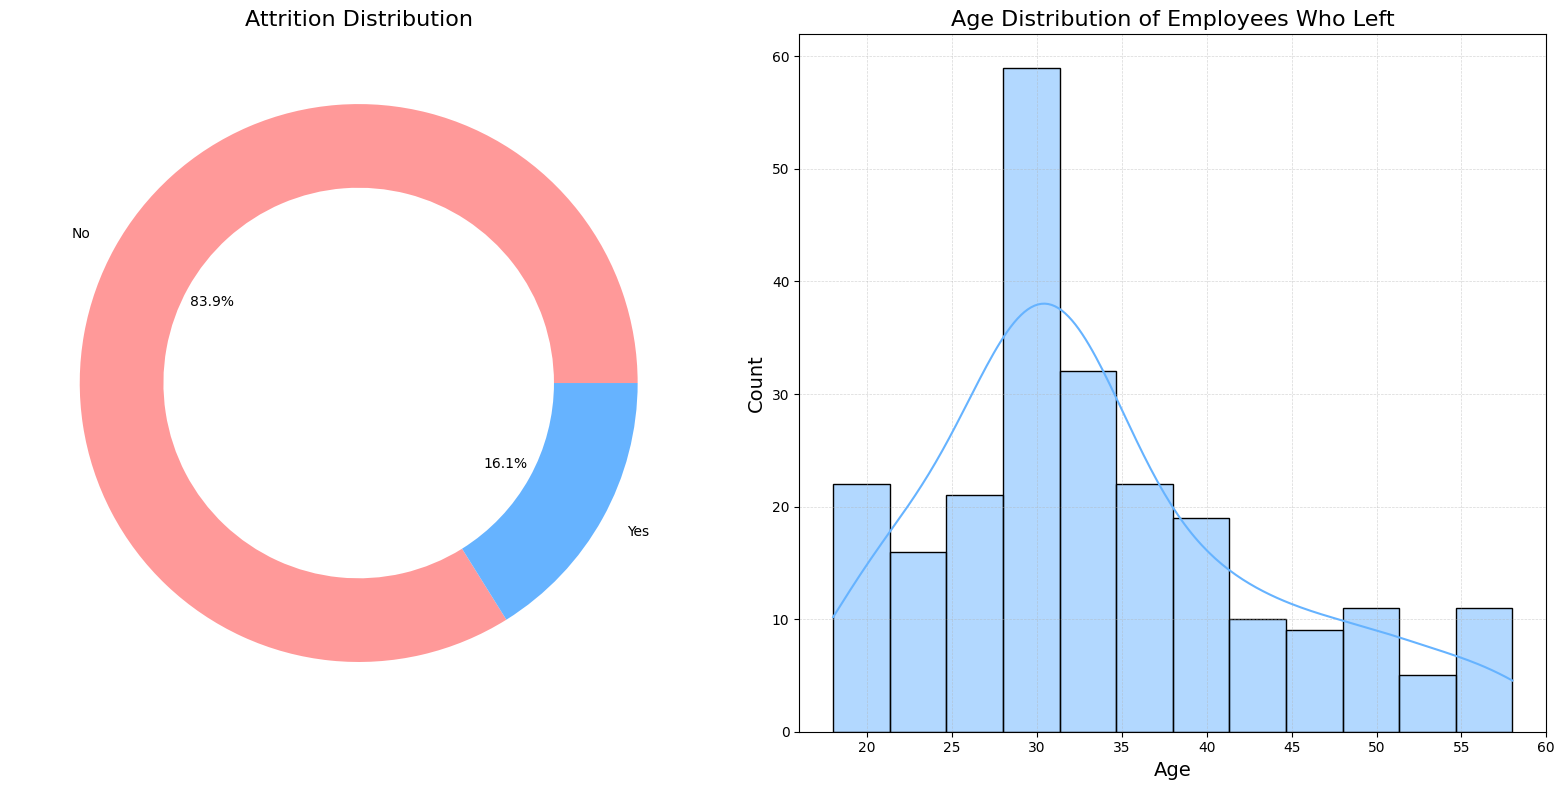

In [14]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))  # ncols=2 for two plots in a row

# Donut Chart: Attrition Breakdown
attrition_counts = data["Attrition"].value_counts()
axes[0].pie(attrition_counts, 
            labels=attrition_counts.index, 
            autopct="%1.1f%%", 
            colors=["#FF9999", "#66B3FF"], 
            wedgeprops={'width': 0.3}  # Creates the hole in the middle
            )

# Add title for the donut chart
axes[0].set_title("Attrition Distribution", fontsize=16)

# Histogram: Age Distribution of Employees Who Left
attrition_left = data[data["Attrition"] == "Yes"]
sns.histplot(attrition_left["Age"], kde=True, ax=axes[1], color="#66B3FF")

# Customize the histogram plot
axes[1].set_title("Age Distribution of Employees Who Left", fontsize=16)
axes[1].set_xlabel("Age", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding faint gridlines

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


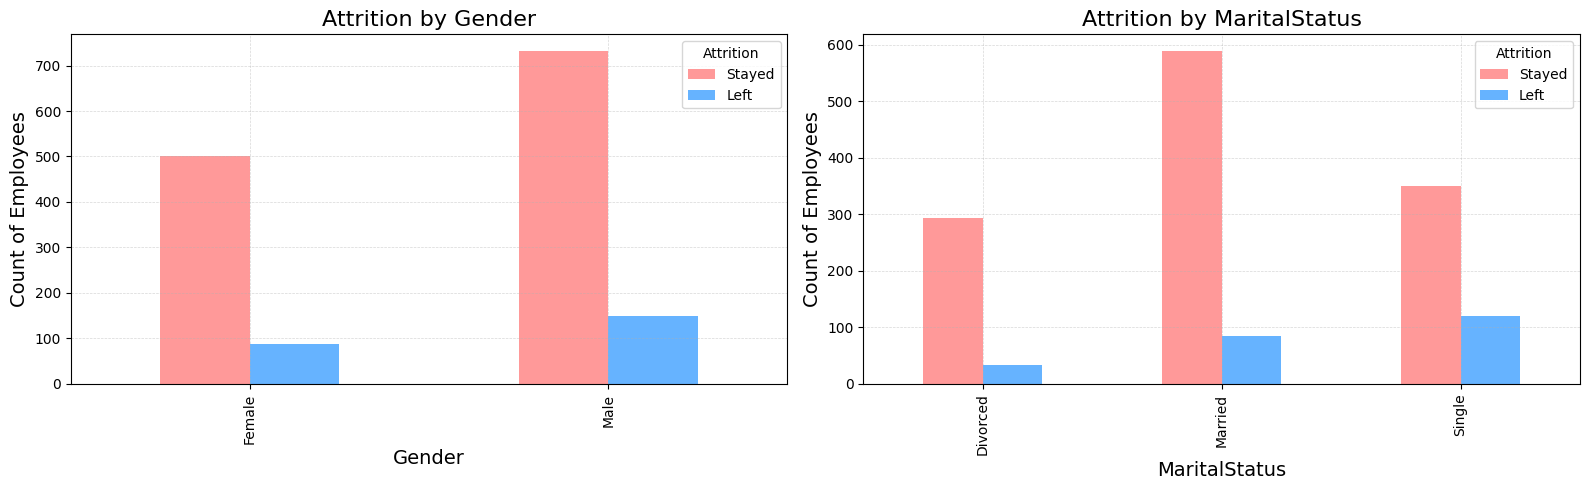

In [17]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))  # ncols=2 for two plots in a row

# Bar Chart: Attrition by Gender
attrition_gender = data.groupby("Gender")["Attrition"].value_counts().unstack(fill_value=0)
attrition_gender.plot(kind="bar", stacked=False, ax=axes[0], color=["#FF9999", "#66B3FF"])
axes[0].set_title("Attrition by Gender", fontsize=16)
axes[0].set_xlabel("Gender", fontsize=14)
axes[0].set_ylabel("Count of Employees", fontsize=14)
axes[0].legend(title="Attrition", loc="upper right", labels=["Stayed", "Left"])
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding faint gridlines

# Bar Chart: Attrition by MaritalStatus
attrition_marital = data.groupby("MaritalStatus")["Attrition"].value_counts().unstack(fill_value=0)
attrition_marital.plot(kind="bar", stacked=False, ax=axes[1], color=["#FF9999", "#66B3FF"])
axes[1].set_title("Attrition by MaritalStatus", fontsize=16)
axes[1].set_xlabel("MaritalStatus", fontsize=14)
axes[1].set_ylabel("Count of Employees", fontsize=14)
axes[1].legend(title="Attrition", loc="upper right", labels=["Stayed", "Left"])
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding faint gridlines

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

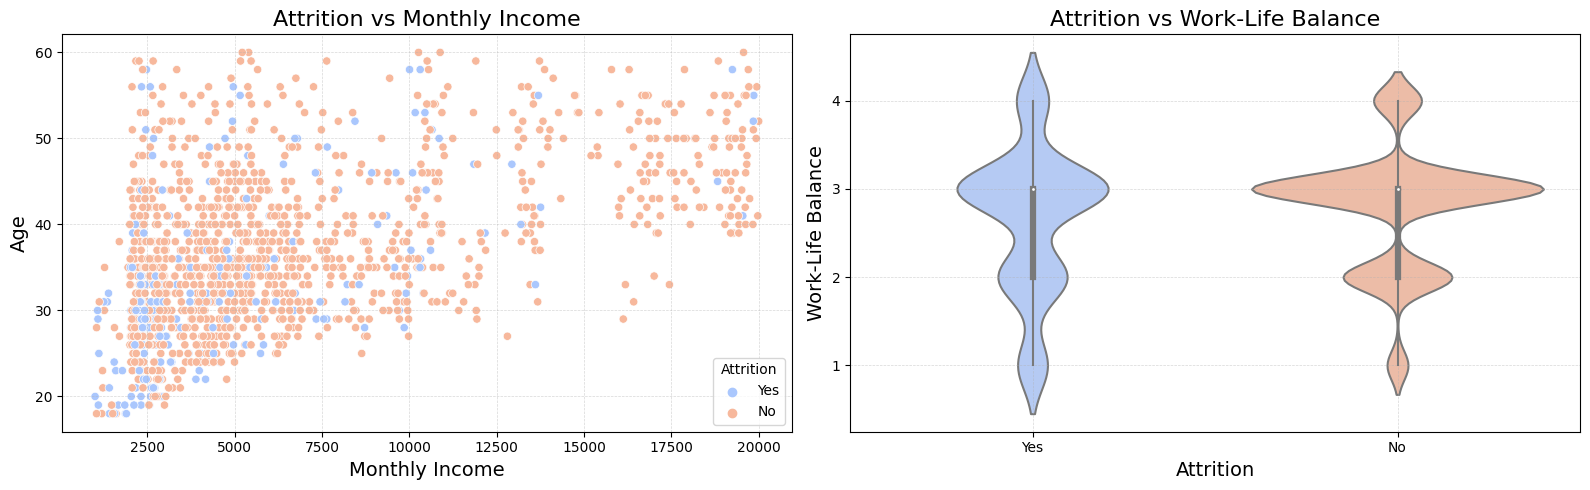

In [18]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))  # ncols=2 for two plots in a row

# Scatter Plot: Attrition vs Monthly Income
sns.scatterplot(data=data, x="MonthlyIncome", y="Age", hue="Attrition", palette="coolwarm", ax=axes[0])
axes[0].set_title("Attrition vs Monthly Income", fontsize=16)
axes[0].set_xlabel("Monthly Income", fontsize=14)
axes[0].set_ylabel("Age", fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding faint gridlines

# Violin Plot: Attrition vs Work-Life Balance
sns.violinplot(x="Attrition", y="WorkLifeBalance", data=data, ax=axes[1], palette="coolwarm")
axes[1].set_title("Attrition vs Work-Life Balance", fontsize=16)
axes[1].set_xlabel("Attrition", fontsize=14)
axes[1].set_ylabel("Work-Life Balance", fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding faint gridlines

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

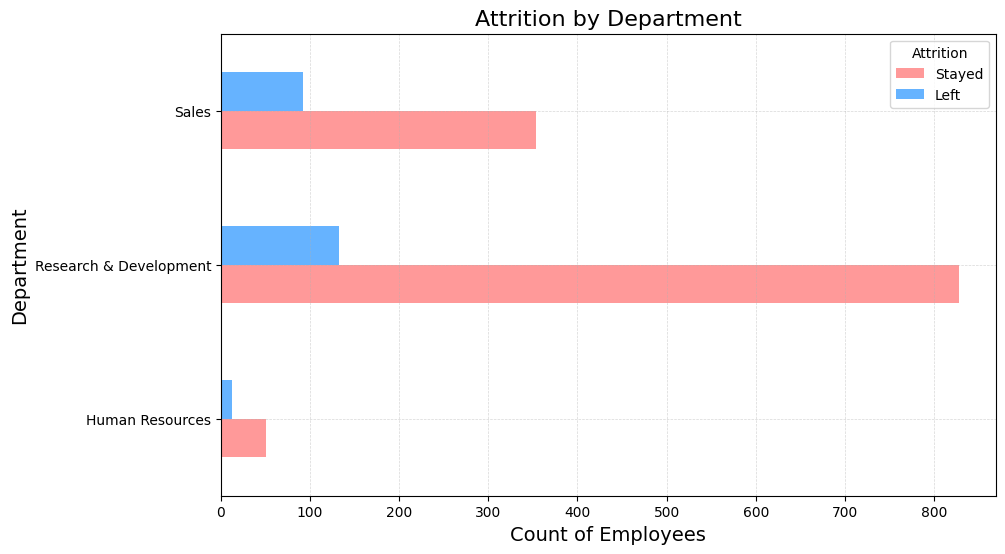

In [15]:
# Horizontal Bar Chart: Attrition by Department
attrition_dept = data.groupby("Department")["Attrition"].value_counts().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
attrition_dept.plot(kind="barh", stacked=False, ax=ax, color=["#FF9999", "#66B3FF"])
ax.set_title("Attrition by Department", fontsize=16)
ax.set_xlabel("Count of Employees", fontsize=14)
ax.set_ylabel("Department", fontsize=14)
ax.legend(title="Attrition", loc="upper right", labels=["Stayed", "Left"])
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding faint gridlines
plt.show()

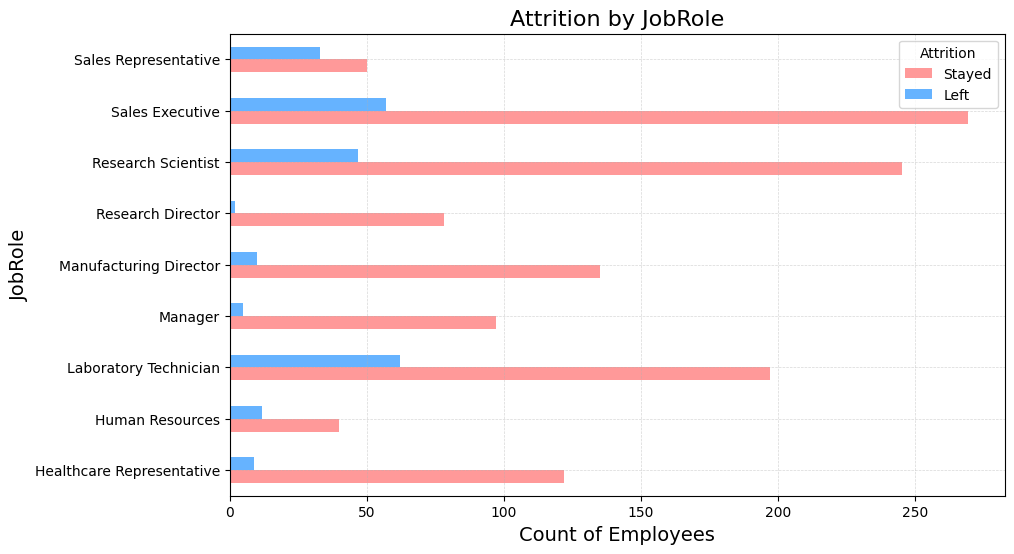

In [21]:
# Horizontal Bar Chart: Attrition by JobRole
attrition_jobrole = data.groupby("JobRole")["Attrition"].value_counts().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
attrition_jobrole.plot(kind="barh", stacked=False, ax=ax, color=["#FF9999", "#66B3FF"])
ax.set_title("Attrition by JobRole", fontsize=16)
ax.set_xlabel("Count of Employees", fontsize=14)
ax.set_ylabel("JobRole", fontsize=14)
ax.legend(title="Attrition", loc="upper right", labels=["Stayed", "Left"])
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding faint gridlines
plt.show()

# Predictive Modeling

Explain

## Model 0: Base Classifier with RandomForest

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [4]:
# Prepare data
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
MLData = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
MLData['Attrition'] = MLData['Attrition'].map({'Yes': 1, 'No': 0})

# Features and target
X = MLData.drop(['Attrition', 'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, errors='ignore')
y = MLData['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Model evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print classification report
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score     support
0              0.878893  0.996078  0.933824  255.000000
1              0.800000  0.102564  0.181818   39.000000
accuracy       0.877551  0.877551  0.877551    0.877551
macro avg      0.839446  0.549321  0.557821  294.000000
weighted avg   0.868427  0.877551  0.834068  294.000000


In [6]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.75


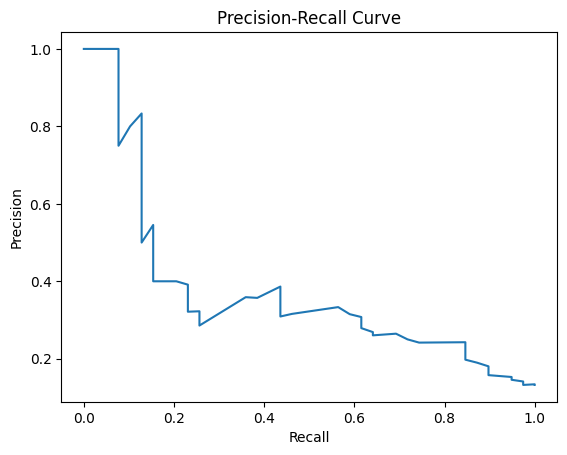

In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

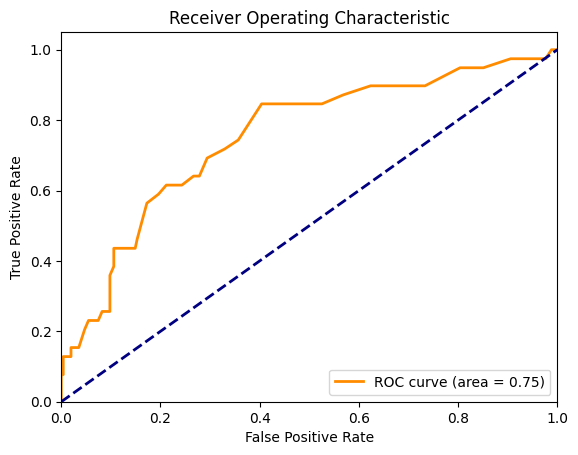

In [10]:
# Random Forest ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

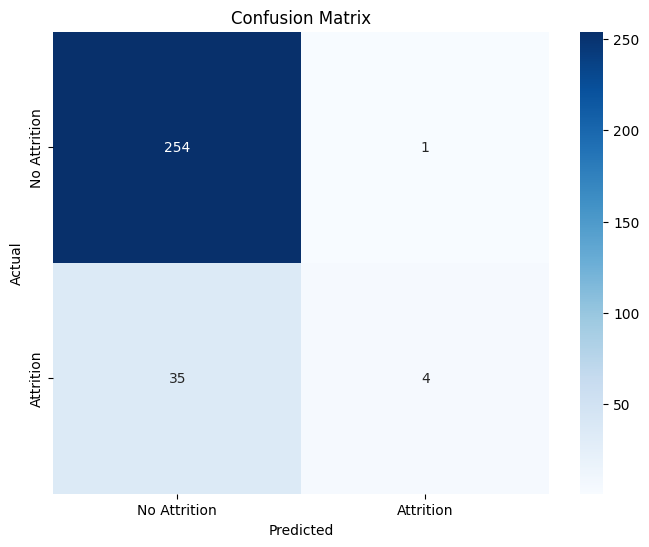

In [11]:
# Random Forest Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Model 1: Addressing Class Imbalance with SMOTE

In [13]:
# Import necessary libraries
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Prepare data
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
MLData = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
MLData['Attrition'] = MLData['Attrition'].map({'Yes': 1, 'No': 0})

# Features and target
X = MLData.drop(['Attrition', 'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, errors='ignore')
y = MLData['Attrition']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the model
class_weights = {0: 1, 1: 1.5}  # Example of custom class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weights)

model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight={0: 1, 1: 1.5}, random_state=42)

In [15]:
# Model evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print classification report
print("Classification Report:")
print(report_df)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score     support
0              0.911111  0.964706  0.937143  255.000000
1              0.625000  0.384615  0.476190   39.000000
accuracy       0.887755  0.887755  0.887755    0.887755
macro avg      0.768056  0.674661  0.706667  294.000000
weighted avg   0.873158  0.887755  0.875996  294.000000
ROC-AUC Score: 0.72


### Feature Importance - ALL

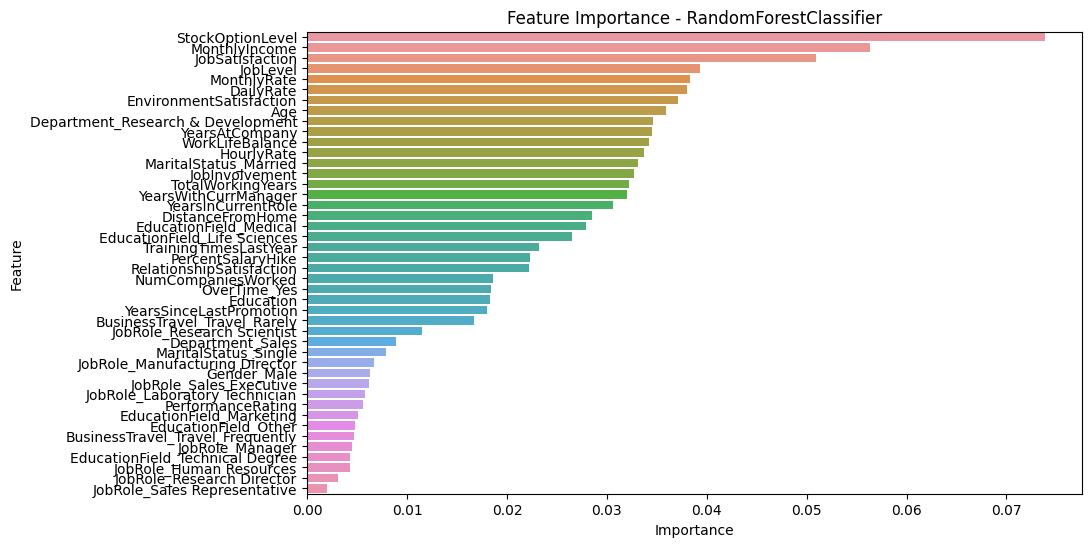

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
importances = model.feature_importances_

# Get the feature names from the original dataset
feature_names = X.columns  # Using the original feature names before scaling

# Create a DataFrame to hold the feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Feature Importance - with Threshold

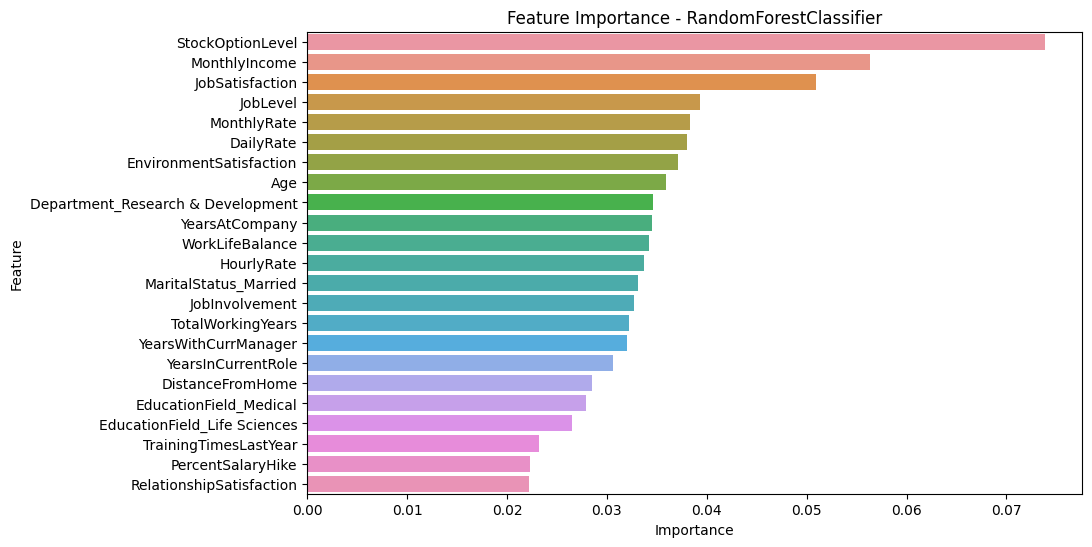

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importance
importances = model.feature_importances_

# Get the feature names from the original dataset
feature_names = X.columns  # Using the original feature names before scaling

# Filter features based on the threshold (importance > 3)
threshold = 0.02  # You can adjust this threshold as needed
filtered_importance_df = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Sort the feature importance in descending order
filtered_importance_df = filtered_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=filtered_importance_df)
plt.title('Feature Importance - RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Print out

In [39]:
# Print out the filtered variables and their importance values
print(filtered_importance_df)

                              Feature  Importance
15                   StockOptionLevel    0.073886
9                       MonthlyIncome    0.056317
8                     JobSatisfaction    0.050891
7                            JobLevel    0.039276
10                        MonthlyRate    0.038346
1                           DailyRate    0.038042
4             EnvironmentSatisfaction    0.037120
0                                 Age    0.035966
25  Department_Research & Development    0.034669
19                     YearsAtCompany    0.034493
18                    WorkLifeBalance    0.034227
5                          HourlyRate    0.033670
41              MaritalStatus_Married    0.033118
6                      JobInvolvement    0.032768
16                  TotalWorkingYears    0.032202
22               YearsWithCurrManager    0.032000
20                 YearsInCurrentRole    0.030659


#Filteer 

In [48]:
# Step 1: Filter the original data to include only important features
selected_features = filtered_importance_df['Feature'].tolist()

# Exclude 'MaritalStatus_Married' from the selected features
selected_features = [feature for feature in selected_features if feature != ('MaritalStatus_Married')]

# Filter the original dataset (X) to only include selected important features, excluding 'MaritalStatus_Married'
X_selected = X[selected_features]

# Step 2: Split the data into train and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling (important for some models like SVM, Logistic Regression, etc.)
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# Step 3: Train a new model (e.g., RandomForestClassifier)
new_model = RandomForestClassifier(random_state=42)
new_model.fit(X_train_selected, y_train)

# Step 4: Evaluate the new model
y_pred_selected = new_model.predict(X_test_selected)
y_prob_selected = new_model.predict_proba(X_test_selected)[:, 1]

# Classification report for the new model
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)
report_selected_df = pd.DataFrame(report_selected).transpose()

# Print the classification report for the new model
print("Classification Report for New Model with Important Features (Excluding 'MaritalStatus_Married'):")
print(report_selected_df)

# Calculate ROC-AUC score for the new model
roc_auc_selected = roc_auc_score(y_test, y_prob_selected)
print(f"ROC-AUC Score for New Model: {roc_auc_selected:.2f}")


Classification Report for New Model with Important Features (Excluding 'MaritalStatus_Married'):
              precision    recall  f1-score     support
0              0.872414  0.992157  0.928440  255.000000
1              0.500000  0.051282  0.093023   39.000000
accuracy       0.867347  0.867347  0.867347    0.867347
macro avg      0.686207  0.521719  0.510732  294.000000
weighted avg   0.823012  0.867347  0.817620  294.000000
ROC-AUC Score for New Model: 0.68


## Model 2 – Hyperparameter Tuning with GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare data
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
MLData = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
MLData['Attrition'] = MLData['Attrition'].map({'Yes': 1, 'No': 0})

# Features and target
X = MLData.drop(['Attrition', 'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, errors='ignore')
y = MLData['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Max depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when splitting
    'bootstrap': [True, False]              # Whether to use bootstrap sampling
}

# Set up the GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the model to the training data with resampling
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Model evaluation with the best hyperparameters
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print classification report
print("Classification Report:")
print(report_df)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Best hyperparameters
print("Best Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Classification Report:
              precision    recall  f1-score     support
0              0.891304  0.964706  0.926554  255.000000
1              0.500000  0.230769  0.315789   39.000000
accuracy       0.867347  0.867347  0.867347    0.867347
macro avg      0.695652  0.597738  0.621172  294.000000
weighted avg   0.839397  0.867347  0.845534  294.000000
ROC-AUC Score: 0.73
Best Hyperparameters from GridSearchCV:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Model 3: Other Classifiers – Logistic, XGBoost and SVM

#### Logistic Regression



In [33]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Model evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score     support
0              0.926641  0.941176  0.933852  255.000000
1              0.571429  0.512821  0.540541   39.000000
accuracy       0.884354  0.884354  0.884354    0.884354
macro avg      0.749035  0.726998  0.737196  294.000000
weighted avg   0.879521  0.884354  0.881678  294.000000
ROC-AUC Score: 0.79


#### Gradient Boosting (e.g., XGBoost)



In [34]:
from xgboost import XGBClassifier

# Train the model
model = XGBClassifier(scale_pos_weight=1.5, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Model evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score     support
0              0.902985  0.949020  0.925430  255.000000
1              0.500000  0.333333  0.400000   39.000000
accuracy       0.867347  0.867347  0.867347    0.867347
macro avg      0.701493  0.641176  0.662715  294.000000
weighted avg   0.849528  0.867347  0.855730  294.000000
ROC-AUC Score: 0.79


#### Support Vector Classifier (SVC)

In [35]:
from sklearn.svm import SVC

# Train the model
model = SVC(class_weight='balanced', probability=True, random_state=42)
#model = SVC(class_weight=class_weights, probability=True, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Model evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score     support
0              0.909747  0.988235  0.947368  255.000000
1              0.823529  0.358974  0.500000   39.000000
accuracy       0.904762  0.904762  0.904762    0.904762
macro avg      0.866638  0.673605  0.723684  294.000000
weighted avg   0.898310  0.904762  0.888024  294.000000
ROC-AUC Score: 0.81


## Model 4: Using Ensemble Method

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Define individual classifiers
logreg = LogisticRegression(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=1.5, random_state=42)
svc = SVC(class_weight='balanced', probability=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('xgb', xgb), ('svc', svc), ('knn', knn), ('rf', rf)], voting='soft')

# Train the model
voting_clf.fit(X_train_resampled, y_train_resampled)

# Model evaluation
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score     support
0              0.915129  0.972549  0.942966  255.000000
1              0.695652  0.410256  0.516129   39.000000
accuracy       0.897959  0.897959  0.897959    0.897959
macro avg      0.805391  0.691403  0.729547  294.000000
weighted avg   0.886015  0.897959  0.886345  294.000000
ROC-AUC Score: 0.81


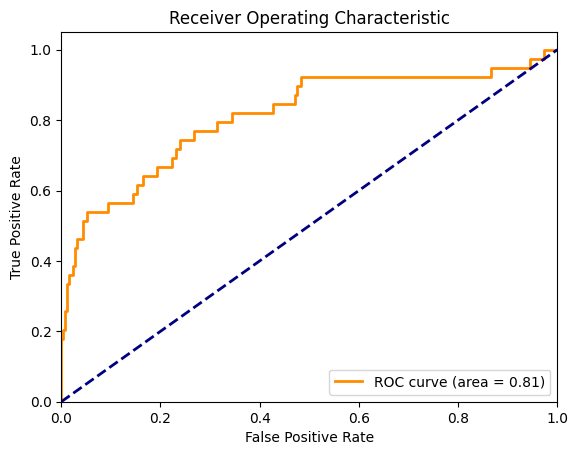

In [17]:
# Ensemble Forest ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

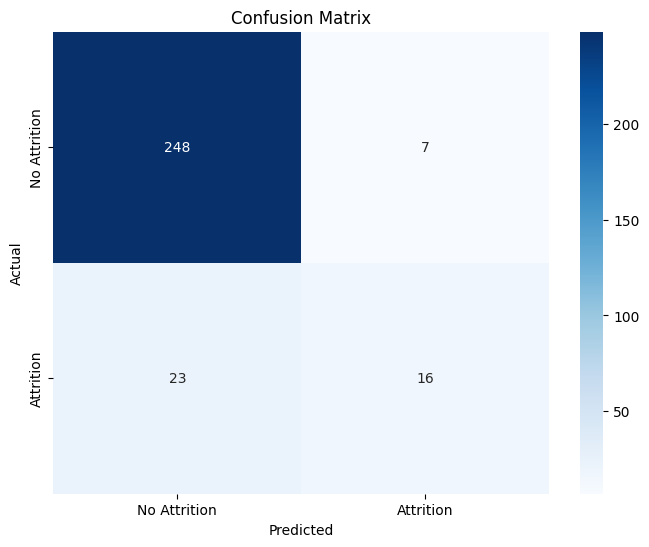

In [18]:
# Ensemble Technique Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()